# 0.0 IMPORTS

In [1]:
import math
import datetime
import inflection

import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt

from IPython.display      import Image
from IPython.core.display import HTML

## 0.1. Helper Functions

In [2]:
# Create a function with my configurations:
def my_settings():
    
    # plotly settings
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [22, 11]
    plt.rcParams['font.size'] = 24
        
    # notebook settings
    display(HTML('<style>.container{width:85% !important;}</style>'))
    np.set_printoptions(suppress=True)
    pd.set_option('display.float_format', '{:.2f}'.format)
        
    # seaborn settings
    sns.set(rc={'figure.figsize':(20,10)})
    sns.set_theme(style = 'darkgrid', font_scale = 1.5)
    

## 0.2. Loading Data

In [3]:
# load datasets
df_sales_raw = pd.read_csv('train.csv', low_memory=False)
df_store_raw = pd.read_csv('store.csv', low_memory=False)

# Merging datsets
df_raw = pd.merge(df_sales_raw, df_store_raw, how='left', on='Store')

In [4]:
df_raw

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


# 1.0. STEP 01: DATA DESCRIPTION

In [5]:
df1 = df_raw.copy()

## 1.1. Rename Columns

In [6]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday',
            'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list(map(snakecase, cols_old))

# rename:
df1.columns = cols_new

## 1.2. Data Dimensions

In [7]:
print('Number of Rows: {}'.format(df1.shape[0]))
print(f'Number of Cols: {df1.shape[1]}')

Number of Rows: 1017209
Number of Cols: 18


## 1.3. Data Types

In [8]:
df1['date'] = pd.to_datetime(df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 1.4. Check NAs

In [9]:
# Check the sum of NA by column:
df1.isna().sum() 

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5. Fill out NAs

In [10]:
# Fill competition_distance:
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000.0 if math.isnan(x) else x)

# fill competition_open_since_month:
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) 
                                                                          else x['competition_open_since_month'] , axis=1)

# fill competition_open_since_year:
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) 
                                                                        else x['competition_open_since_year'] , axis=1)

# fill NA in promo2_since_week:
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week'])
                                                              else x['promo2_since_week'] , axis=1)

# fill NA in promo2_since_year:
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year'])
                                                              else x['promo2_since_year'] , axis=1)

# fill promo_interval:
month_map = {1 : 'Jan', 2 : 'Fev', 3  : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8  : 'Aug', 9  : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'}

# preencher os valores NA com 0:
df1['promo_interval'].fillna(0, inplace = True)

# fazer um mapeamento e busca do mês usando um dicionário, conforme número do mês em 'date': 
df1['month_map'] = df1['date'].dt.month.map( month_map )

#
df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)


## 1.6. Change Types    

In [11]:
# 'competition_open_since_month' and 'competition_open_since_year' are integer, not float:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype('int64')
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype('int64')

# 'promo2_since_week' and 'promo2_since_year' are integer, not float:
df1['promo2_since_week'] = df1['promo2_since_week'].astype('int64')
df1['promo2_since_year'] = df1['promo2_since_year'].astype('int64')

## 1.7. Descriptive Statistical

In [12]:
# Separando as Variáveis em Numéricas e Categóricas
num_attributes = df1.select_dtypes(include=['int64', 'float64'])

cat_attributes = df1.select_dtypes(exclude= ['int64', 'float64', 'datetime64[ns]'])

### 1.7.1. Numerical Attributes

In [13]:
# Central Tendency: Mean, Median
ct1 = pd.DataFrame(num_attributes.apply(np.mean)).T
ct2 = pd.DataFrame(num_attributes.apply(np.median)).T

# Dispersion: - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_attributes.apply(np.std)).T
d2 = pd.DataFrame(num_attributes.apply(np.min)).T
d3 = pd.DataFrame(num_attributes.apply(np.max)).T
d4 = pd.DataFrame( num_attributes.apply(np.max) - num_attributes.apply(np.min) ).T
d5 = pd.DataFrame(num_attributes.apply( lambda x: x.skew() )).T
d6 = pd.DataFrame(num_attributes.apply( lambda x: x.kurtosis() )).T

# concatenate
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


### 1.7.2. Categorical Attributes

In [14]:
# check for unique values by columns:
cat_attributes.apply( lambda x: x.unique().shape[0] )

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

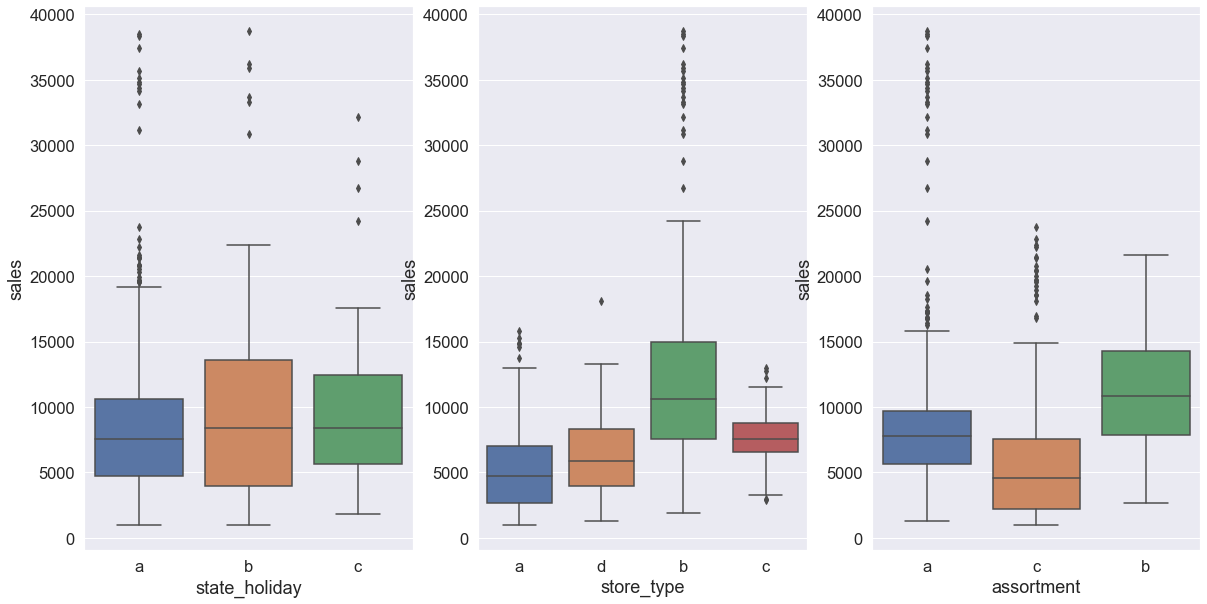

In [20]:
# load configurations:
# my_settings()

# filter: sales during a state holiday (aux1)
aux1 = df1[ ( df1['state_holiday'] != '0' ) & (df1['sales'] > 0) ]

plt.subplot(1, 3, 1)
sns.boxplot(x = 'state_holiday' , y= 'sales' , data= aux1);

plt.subplot(1, 3, 2)
sns.boxplot(x = 'store_type' , y= 'sales' , data= aux1);

plt.subplot(1, 3, 3)
sns.boxplot(x = 'assortment' , y= 'sales' , data= aux1);

# 2.0. STEP 02: FEATURE ENGINEERING

In [16]:
df2=df1.copy()

## 2.1. Mind Map Hypothesis

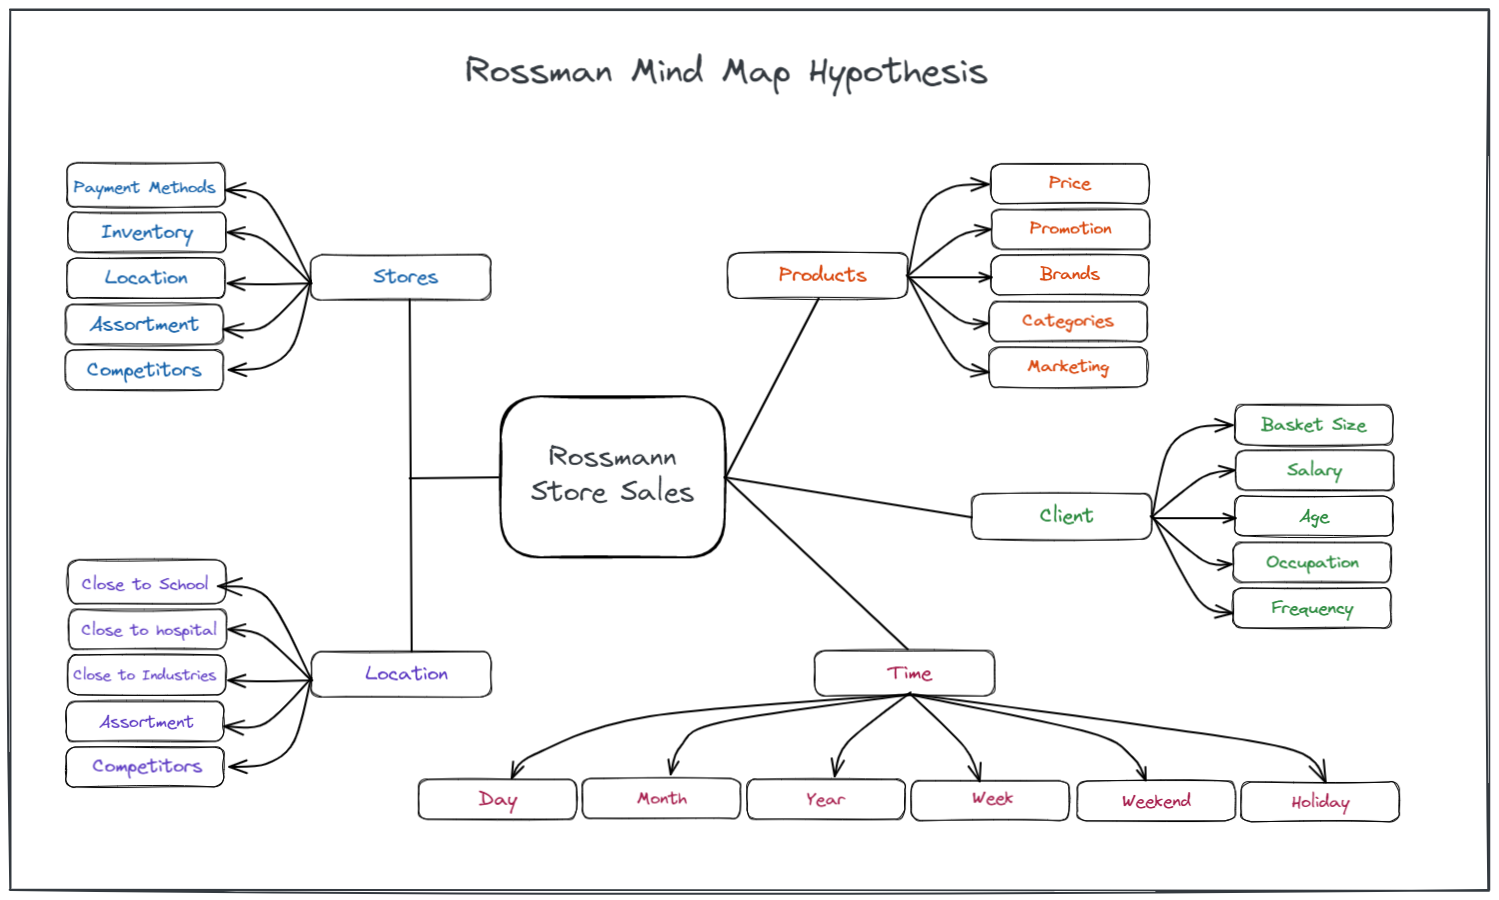

In [10]:
Image(data = 'Rossmann-mind-map-hypothesis.png')

## 2.2. Creating Hypothesis

### 2.2.1. Store Hypothesis

**1.** Stores with larger staff should sell more.

**2.** Stores with more inventory capacity should sell more.

**3.** Larger stores should sell more.

**4.** Stores with a larger assortment should sell more.

**5.** Stores with closer competitors should sell less. 

### 2.2.2. Product Hypothesis

**1.** Stores that invest more in Marketing should sell more.

**2.** Stores that display more product in shop windows should sell more.

**3.** Stores with lower product prices should sell more.

**4.** Stores that have lower prices for longer on products should sell more.

**5.** Stores with more aggressive promotions (larger discounts) should sell more.

**6.** Stores with promotions active for longer should sell more.

**7.** Stores with more promotion days should sell more.

**8.** Stores with more consecutive promotions should sell more.

### 2.2.3. Time Hypothesis

**1.** Stores open during the Christmas holiday should sell more.

**2.** Stores should sell more over the years.

**3.** Stores should sell more in the second half of the year.

**4.** Stores should sell more after the 10th of each month.

**5.** Stores should sell less on weekends.

**6.** Stores should sell less during school holidays.

## 2.3. Final Hypothesis List

**Store Hypothesis:**
    
**1.** Stores with a larger assortment should sell more.

**2.** Stores with closer competitors should sell less.

**3.** Stores with longer-term competitors should sell more.

------------------------------------------------- ------------------------------------------------- ------------------------
**Product Hypothesis:**

**4.** Stores with promotions active for longer should sell more.

**5.** Stores with more promotion days should sell more.

**6.** Stores with more consecutive promotions should sell more.

------------------------------------------------- ------------------------------------------------- ------------------------
**Time Assumption:**

**7.** Stores open during the Christmas holiday should sell more.

**8.** Stores should sell more over the years.

**9.** Stores should sell more in the second half of the year.

**10.** Stores should sell more after the 10th of each month.

**11.** Stores should sell less on weekends.

**12.** Stores should sell less during school holidays.

## 2.4. Feature Engineering

In [17]:
# Creating column year:
df2['year'] = df2['date'].dt.year

# Creating column month:
df2['month'] = df2['date'].dt.month

# Creating column day:
df2['day'] = df2['date'].dt.day

# Creating column week_of_year
df2['week_of_year'] = df2['date'].dt.isocalendar().week

# Creating column year_week:
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )


# Creating competition_since (As we don't have the day, let's consider the 1st of each month.):
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year = x['competition_open_since_year'] , month= x['competition_open_since_month'] , day= 1), axis= 1)

# Creating column competition_time_month → Time in months the competitor is open:
df2['competition_time_month'] = ( ( df2['date'] - df2['competition_since'] ) / 30 ).apply(lambda x: x.days ).astype('int64') # para manter granularidade mensal

# Creating column promo since: 
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str)
df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x + '-1', '%Y-%W-%w') - datetime.timedelta( days = 7) )

# Creating column promo_time_week (time the promo is active in weeks):
df2['promo_time_week'] = ( (df2['date'] - df2['promo_since'])/7 ).apply(lambda x: x.days).astype('int64')

# Converting assortment:
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x =='a' else 'extra' if x == 'b'  else 'extended')

# Converting state holiday:
df2['state_holiday'] = df2['state_holiday'].apply(lambda x: 'public_holiday' if x == 'a'
                                                          else 'easter_holiday'if x == 'b' 
                                                          else 'christmas' if x == 'c' 
                                                          else 'regular_day')

In [18]:
df2.sample(5).T

,682448,984424,683062,403421,973775
store,854,665,353,737,51
day_of_week,1,3,7,7,5
date,2013-10-28 00:00:00,2013-01-30 00:00:00,2013-10-27 00:00:00,2014-07-06 00:00:00,2013-02-08 00:00:00
sales,5055,6269,6947,0,7202
customers,596,1084,1535,0,554
open,1,1,1,0,1
promo,0,0,0,0,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,0,0,0,0
store_type,c,a,b,a,a
